

<img src="https://user-images.githubusercontent.com/7065401/75165824-badf4680-5701-11ea-9c5b-5475b0a33abf.png"
    style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>

# Reading external data & Plotting


In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Pandas can easily read data stored in different file formats like CSV, JSON, XML or even Excel. Parsing always involves specifying the correct structure, encoding and other details. The `read_csv` method reads CSV files and accepts many parameters.

In [2]:
df = pd.read_csv('btc-market-price.csv')

In [3]:
df.head()

,2017-04-02 00:00:00,1099.169125
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250


The CSV file we're reading has only two columns: `timestamp` and `price`. It doesn't have a header, it contains whitespaces and has values separated by commas. pandas automatically assigned the first row of data as headers, which is incorrect. We can overwrite this behavior with the `header` parameter:

In [4]:
df = pd.read_csv('btc-market-price.csv', header=None)

In [5]:
df.head()

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


We can then set the names of each column explicitely by setting the `df.columns` attribute:

In [6]:
df.columns = ['Timestamp', 'Price']

In [7]:
df.shape

(365, 2)

In [8]:
df.head()

,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [9]:
df.tail(3)

,Timestamp,Price
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000
364,2018-04-01 00:00:00,6794.105000


The type of the `Price` column was correctly interpreted as `float`, but the `Timestamp` was interpreted as a regular string (`object` in pandas notation):

In [10]:
df.dtypes

Timestamp     object
Price        float64
dtype: object

We can perform a vectorized operation to parse all the Timestamp values as `Datetime` objects:

In [11]:
pd.to_datetime(df['Timestamp']).head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: Timestamp, dtype: datetime64[ns]

In [12]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [13]:
df.head()

,Timestamp,Price
0,2017-04-02,1099.169125
1,2017-04-03,1141.813000
2,2017-04-04,1141.600363
3,2017-04-05,1133.079314
4,2017-04-06,1196.307937


In [14]:
df.dtypes

Timestamp    datetime64[ns]
Price               float64
dtype: object

The timestamp looks a lot like the index of this `DataFrame`: `date > price`. We can change the autoincremental ID generated by pandas and use the `Timestamp DS` column as the Index:

In [15]:
df.set_index('Timestamp', inplace=True)

In [16]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [17]:
df.loc['2017-09-29']

Price    4193.574667
Name: 2017-09-29 00:00:00, dtype: float64


## Putting everything together

And now, we've finally arrived to the final, desired version of the `DataFrame` parsed from our CSV file. The steps were:

In [18]:
df = pd.read_csv('btc-market-price.csv', header=None)
df.columns = ['Timestamp', 'Price']
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

In [19]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937




The `read_csv` function is extremely powerful and you can specify many more parameters at import time. We can achive the same results with only one line by doing:

In [20]:
df = pd.read_csv(
    'btc-market-price.csv',
    header=None,
    names=['Timestamp', 'Price'],
    index_col=0,
    parse_dates=True
)

In [21]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [22]:
df.loc['2017-09-29']

Price    4193.574667
Name: 2017-09-29 00:00:00, dtype: float64



## Plotting basics

`pandas` integrates with Matplotlib and creating a plot is as simple as:

<Axes: xlabel='Timestamp'>

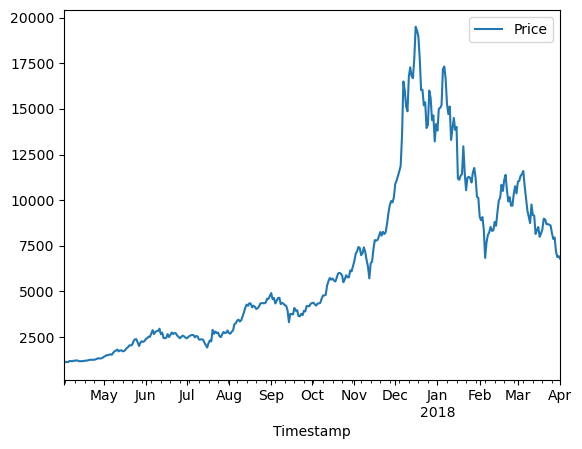

In [23]:
df.plot()

Behind the scenes, it's using `matplotlib.pyplot`'s interface. We can create a similar plot with the `plt.plot()` function:

In [24]:
plt.plot(df.index, df['Price'])

NameError: name 'plt' is not defined

`plt.plot()` accepts many parameters, but the first two ones are the most important ones: the values for the `X` and `Y` axes. Another example:

In [ ]:
x = np.arange(-10, 11)

In [ ]:
plt.plot(x, x ** 2)

We're using `matplotlib`'s global API, which is horrible but it's the most popular one. We'll learn later how to use the _OOP_ API which will make our work much easier.

In [ ]:
plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

Each `plt` function alters the global state. If you want to set settings of your plot you can use the `plt.figure` function. Others like `plt.title` keep altering the global plot:

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

plt.title('My Nice Plot')

Some of the arguments in `plt.figure` and `plt.plot` are available in the pandas' `plot` interface:

In [ ]:
df.plot(figsize=(16, 9), title='Bitcoin Price 2017-2018')



## A more challenging parsing

To demonstrate plotting two columns together, we'll try to add Ether prices to our `df` DataFrame. The ETH prices data can be found in the `data/eth-price.csv` file. The problem is that it seems like that CSV file was created by someone who really hated programmers. Take a look at it and see how ugly it looks like. We'll still use `pandas` to parse it.

In [ ]:
eth = pd.read_csv('eth-price.csv')

eth.head()

As you can see, it has a `Value` column (which represents the price), a `Date(UTC)` one that has a string representing dates and also a `UnixTimeStamp` date represeting the datetime in unix timestamp format. The header is read automatically, let's try to parse dates with the CSV Reader:

In [ ]:
eth = pd.read_csv('eth-price.csv', parse_dates=True)

print(eth.dtypes)
eth.head()

Seems like the `parse_dates` attribute didn't work. We'll need to add a little bit more customization. Let's divide this problem and focus on the problem of "date parsing" first. The simplest option would be to use the `UnixTimeStamp` column. The `pandas` module has a `to_datetime` function that converts Unix timestamps to Datetime objects automatically:

In [ ]:
pd.to_datetime(eth['UnixTimeStamp']).head()

The problem is the precision of unix timestamps. To match both columns we'll need to use the same index and, our `df` containing Bitcoin prices, is "per day":

In [ ]:
df.head()

We could either, remove the precision of `UnixTimeStamp` or attempt to parse the `Date(UTC)`. Let's do String parsing of `Date(UTC)` for fun:

In [ ]:
pd.to_datetime(eth['Date(UTC)']).head()

That seems to work fine! Why isn't it then parsing the `Date(UTC)` column? Simple, the `parse_dates=True` parameter will instruct pandas to parse the index of the `DataFrame`. If you want to parse any other column, you must explicitly pass the column position or name:

In [ ]:
pd.read_csv('eth-price.csv', parse_dates=[0]).head()

Putting everything together again:

In [ ]:
eth = pd.read_csv('eth-price.csv', parse_dates=True, index_col=0)
print(eth.info())

eth.head()

We can now combine both `DataFrame`s into one. Both have the same index, so aligning both prices will be easy. Let's first create an empty `DataFrame` and with the index from Bitcoin prices:

In [ ]:
prices = pd.DataFrame(index=df.index)

In [ ]:
prices.head()

And we can now just set columns from the other `DataFrame`s:

In [ ]:
prices['Bitcoin'] = df['Price']

In [ ]:
prices['Ether'] = eth['Value']

In [ ]:
prices.head()

We can now try plotting both values:

In [ ]:
prices.plot(figsize=(12, 6))

🤔seems like there's a tiny gap between Dec 2017 and Jan 2018. Let's zoom in there:

In [ ]:
prices.loc['2017-12-01':'2018-01-01'].plot(figsize=(12, 6))

Oh no, missing data 😱. We'll learn how to deal with that later 😉.

Btw, did you note that fancy indexing `'2017-12-01':'2018-01-01'` 😏. That's pandas power 💪. We'll learn how to deal with TimeSeries later too.